<a href="https://colab.research.google.com/github/leoazeved0/mvp_puc_rio/blob/main/Machine_Learning_Dataset_Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MVP PUC - Machine Learning - Sprint 2**

##**1 - Introdução**

Este estudo tem como objetivo mostrar o uso de técnicas de aprendizado de máquina para fornecer uma solução para o problema de igualdade de renda. O "Adult" Dataset foi usado para esse fim. A classificação foi feita para prever se a renda anual de uma pessoa nos EUA cai na categoria de renda superior a 50 mil dólares ou menos de 50 mil dólares com base em um determinado conjunto de atributos.

Ronny Kohavi e Barry Becker extraíram o conjunto de dados do banco de dados do censo de 1994. O conjunto de dados contém informações sobre 32.561 registros individuais e 14 atributos compreendendo seis variáveis ​​contínuas e oito categóricas.

A lista completa das variáveis ​​é a seguinte:

Age, Workclass, Final Weight, Education, Education Number of Years, Marital-status, Occupation, Relationship, Race, Sex, Capital-gain, Capital-loss,Hours-per-week, Native-country.

O conjunto de dados contém valores ausentes que são marcados com um caractere de ponto de interrogação (?).

Existem dois valores de classe ">50K" e "<=50K".

Usando conjuntos predefinidos de treinamento e teste, um bom erro de classificação relatado é de aproximadamente 14 por cento ou uma precisão de classificação de cerca de 86 por cento.
Este será um alvo a ser buscado ao trabalhar neste conjunto de dados.

##**2 - Import das bibliotecas**

In [408]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [409]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
import seaborn as sns # for statistical data visualization
%matplotlib inline
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


##**3 - Carregando o Dataset**

In [410]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/leoazeved0/mvp_puc_rio/main/adult.csv"

# Lê o arquivo
dataset = pd.read_csv(url,  header = None, sep=',\s')

# Mostra as 5 primeiras linhas do dataset
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


O dataset contém 32.561 linhas e 15 colunas.

In [411]:
print(dataset.shape)

(32561, 15)


##**4 - Análise exploratória dos dados**

In [412]:
# Adicionando os nomes das colunas no dataset
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

dataset.columns = col_names

# As 5 primeiras linhas
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [413]:
# As últimas 5 linhas
dataset.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [414]:
# Resumo de distribuição das classes
target = dataset.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
 per = v / len(target) * 100
 print('Class=%s, Count=%d, Percentage=%.2f%%' % (k, v, per))

Class=<=50K, Count=24720, Percentage=75.92%
Class=>50K, Count=7841, Percentage=24.08%


In [415]:
# Informação das colunas existentes e a quantidade de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [416]:
# Visualizando as colunas com valores do tipo 'object'
colunascategoricas = [var for var in dataset.columns if dataset[var].dtype=='O']

print('São {} colunas \n'.format(len(colunascategoricas)))

print('As colunas são :\n\n', colunascategoricas)



São 9 colunas 

As colunas são :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


Explorando problemas nas variáveis categóricas.



In [417]:
# Valores ausentes em cada uma das colunas com os valores do tipo 'object'
dataset[colunascategoricas].isnull().sum()


workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [418]:
# Visualizar a quantidade dos valores nas colunas

for coluna in colunascategoricas:

    print(dataset[coluna].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

In [419]:
# Visualizar a participação da frequência de cada um dos valores

for coluna in colunascategoricas:

    print(dataset[coluna].value_counts()/np.float(len(dataset)))

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: float64


Podemos ver que existem algumas colunas ​​como workclass, occupation, native_country que contêm missings. Geralmente, os valores ausentes são codificados como NaN e o python os detectará com o comando df.isnull().sum().

Mas neste caso os valores ausentes são codificados como ?. O Python não detecta esses valores como ausentes porque não considera ? como valores ausentes. Então, eu tenho que substituir com NaN para que o Python possa detectar esses valores ausentes.

Vou explorar os valores destas colunas ​​e substituir com NaN.

In [420]:
# Verificando os valores (distintos) existentes na coluna workclass

dataset.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [421]:
# Checando a quantidade dos valores na coluna workclass

dataset.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Foram identificados 1.836 valores "?". Agora vou substituir o "?" por NaN

In [422]:
# substituindo o "?" em workclass por "NaN"
dataset['workclass'].replace('?', np.NaN, inplace=True)
# checando novamente a frequência dos valores em workclass
dataset.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Agora podemos ver que não há valores como "?" na coluna workclass.
Farei a mesma coisa com as colunas occupation e native_country.

In [423]:
# Checando a quantidade de valores da coluna occupation
dataset.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [424]:
# Substituindo o "?" na coluna occupation por "NaN"
dataset['occupation'].replace('?', np.NaN, inplace=True)
# Checando novamente a frequência dos valores na coluna occupation
dataset.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [425]:
# Checando a quantidade de valores da coluna native_country
dataset.native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [426]:
# Substituindo o "?" na coluna occupation por "NaN"
dataset['native_country'].replace('?', np.NaN, inplace=True)
# Checando novamente a frequência dos valores na coluna native_country
dataset.native_country.value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

Agora checaremos novamente a quantidade de valores ausentes existentes nas colunas qualitativas.

In [427]:
# Quantidade de valores ausentes
dataset[colunascategoricas].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Agora vimos que as colunas workclass, occupation e native_country possuem valores ausentes.

Explorando as colunas com valores numéricos.

In [428]:
# Procurar colunas com valores numéricos

colunanumerica = [coluna for coluna in dataset.columns if dataset[coluna].dtype!='O']

print('São {} colunas com valores numéricos\n'.format(len(colunanumerica)))

print('As colunas com valores numéricos são:', colunanumerica)

São 6 colunas com valores numéricos

As colunas com valores numéricos são: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [429]:
# Visualizar os valores das colunas que contém números
dataset[colunanumerica].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


Agora vamos checar se as colunas que contém valores numéricos possuem valores ausentes.

In [430]:
# Checando valores ausentes nas colunas numéricas

dataset[colunanumerica].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

Podemos verificar que as 6 colunas acima não possuem valores ausentes.

In [431]:
# Visualizar novamente o percentual de valores ausentes nas colunas de valores qualitativos
dataset[colunascategoricas].isnull().mean() * 100

workclass         5.638647
education         0.000000
marital_status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
native_country    1.790486
income            0.000000
dtype: float64

Como verificado anteriormente, apenas as colunas workclass, occupation e native_country possuem valores ausentes, e como a quantidade de valores em cada coluna representam apenas uma pequena amostra do total, preferi retirar do dataset todas as linhas com algum valor ausente em uma das 3 colunas do que usar algum método de substituição.

In [432]:
# Dataset original ainda com os valores ausentes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [433]:
# Retirar as linhas com valores ausentes
dataset = pd.DataFrame(dataset)
dataset = dataset.dropna()
# Dataset sem os valores ausentes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##**5 - Feature Engineering and Selection**##

A variável 'education' e 'education_num' estão correlacionadas, neste caso será extraída a coluna 'education' para reduzir a redundância dos valores.

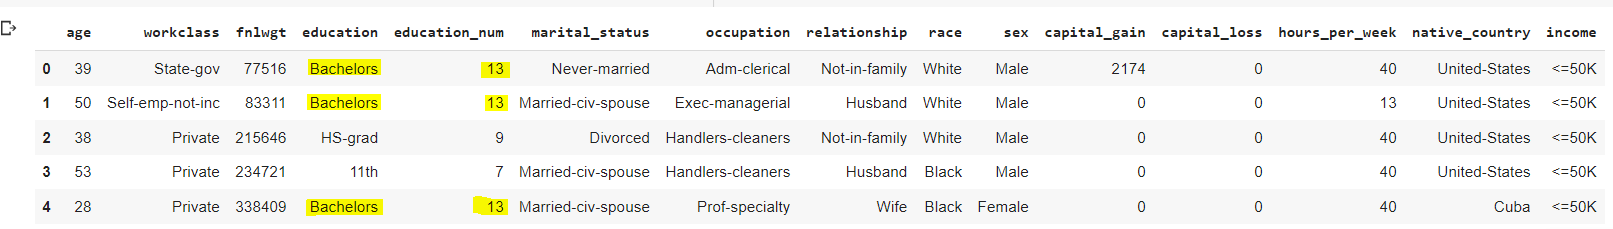

In [434]:
# Extraindo a coluna 'education'
dataset = dataset.drop(['education'], axis = 1)
dataset.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##**6 - Separando em conjuntos de treino e teste**

In [435]:
test_size = 0.30 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Declarando feature vector e target
X = dataset.drop(['income'], axis=1)
y = dataset['income']

# Separação em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

# Checando o shape de X_train and X_test
X_train.shape, X_test.shape

((21113, 13), (9049, 13))

In [436]:
# Checando os valores ausentes em X_train

X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [437]:
# Checando os valores ausentes em X_teste

X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

Agora vou converter as colunas qualitativas em numéricas.

In [438]:
# Codificação one-hot

encoder = ce.OneHotEncoder(cols=['workclass', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_num,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
12234,27,1,0,0,0,0,0,0,171655,9,...,0,0,0,0,0,0,0,0,0,0
11671,36,1,0,0,0,0,0,0,177285,11,...,0,0,0,0,0,0,0,0,0,0
13673,21,1,0,0,0,0,0,0,162228,10,...,0,0,0,0,0,0,0,0,0,0
29829,50,1,0,0,0,0,0,0,46155,11,...,0,0,0,0,0,0,0,0,0,0
26107,43,1,0,0,0,0,0,0,193490,4,...,0,0,0,0,0,0,0,0,0,0


In [439]:
X_train.shape

(21113, 88)

Nós vimos que inicialmente tínhamos 13 colunas, não considerando a coluna das classes, agora temos 88.

Agora visualizaremos o X_test.

In [440]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_num,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
6447,60,0,0,0,0,0,1,0,235535,9,...,0,0,0,0,0,0,0,0,0,0
19681,31,1,0,0,0,0,0,0,94235,13,...,0,0,0,0,0,0,0,0,0,0
6721,63,1,0,0,0,0,0,0,66634,5,...,0,0,0,0,0,0,0,0,0,0
12561,45,1,0,0,0,0,0,0,190088,9,...,0,0,0,0,0,0,0,0,0,0
10448,64,1,0,0,0,0,0,0,379062,10,...,0,0,0,0,0,0,0,0,0,0


In [441]:
X_test.shape

(9049, 88)

Converter a coluna target para 0 e 1.

In [442]:
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_lb = label_encoder.transform(y_train)
y_test_lb = label_encoder.transform(y_test)

##**7 - Treinamento dos modelos**

LR-orig: 0.793 (0.004)
KNN-orig: 0.772 (0.010)
CART-orig: 0.806 (0.006)
NB-orig: 0.791 (0.005)
SVM-orig: 0.787 (0.004)
Bag-orig: 0.849 (0.005)
RF-orig: 0.846 (0.005)
ET-orig: 0.830 (0.006)
Ada-orig: 0.862 (0.004)
GB-orig: 0.862 (0.005)
Vot-orig: 0.811 (0.004)
LR-padr: 0.848 (0.006)
KNN-padr: 0.820 (0.008)
CART-padr: 0.805 (0.007)
NB-padr: 0.465 (0.023)
SVM-padr: 0.844 (0.004)
Bag-padr: 0.850 (0.005)
RF-padr: 0.847 (0.003)
ET-padr: 0.831 (0.006)
Ada-padr: 0.862 (0.004)
GB-padr: 0.862 (0.005)
Vot-padr: 0.852 (0.006)
LR-norm: 0.845 (0.005)
KNN-norm: 0.822 (0.006)
CART-norm: 0.804 (0.007)
NB-norm: 0.509 (0.016)
SVM-norm: 0.833 (0.006)
Bag-norm: 0.849 (0.005)
RF-norm: 0.848 (0.004)
ET-norm: 0.831 (0.006)
Ada-norm: 0.862 (0.004)
GB-norm: 0.862 (0.005)
Vot-norm: 0.847 (0.005)


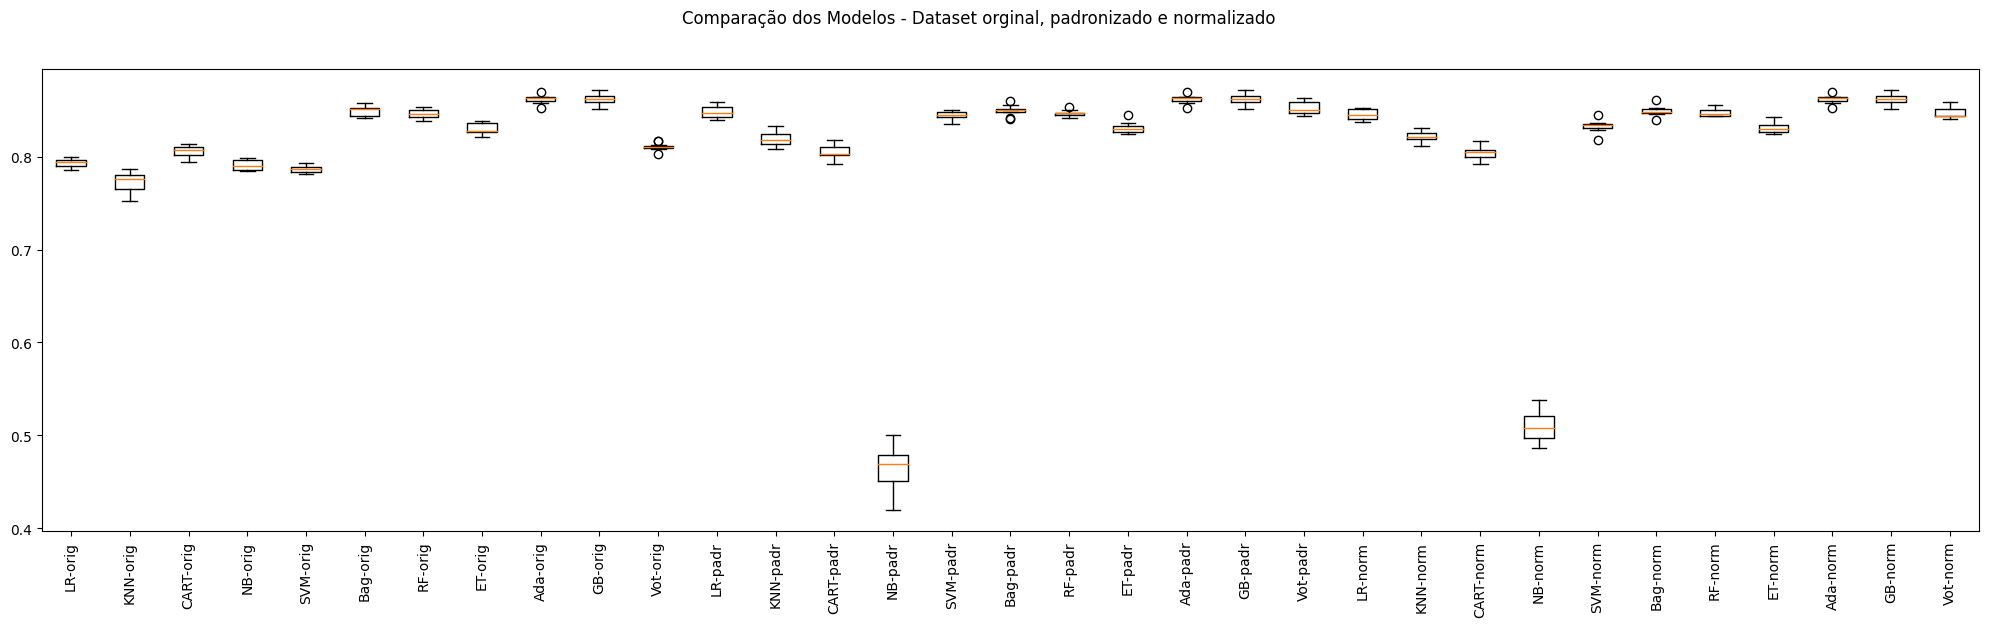

In [443]:
np.random.seed(7) # definindo uma semente global para este bloco
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train_lb, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

##**7 - Aplicando o modelo escolhido**

O modelo escolhido foi o GB-orig, é o que apresentou a melhor acurácia e desvio padrão aceitável.

In [444]:
num_trees = 100
# Modelo escolhido
gb = GradientBoostingClassifier(n_estimators=num_trees)
# Treinando
gb.fit(X_train, y_train_lb)

print('Training set score: {:.4f}'.format(gb.score(X_train, y_train_lb)))
print('Test set score: {:.4f}'.format(gb.score(X_test, y_test_lb)))

Training set score: 0.8680
Test set score: 0.8610


Na predição da base de teste obtive um accuracy score de 86,1%, bem próximo do score de 86,8% obtido no treinamento, o que descarta a presença de overfitting.

In [445]:
# Distribuição das classes da base de teste
target = y_test.values
counter = Counter(target)

for k,v in counter.items():
 per = v / len(target) * 100
 print('Class=%s, Count=%d, Percentage=%.2f%%' % (k, v, per))

Class=<=50K, Count=6797, Percentage=75.11%
Class=>50K, Count=2252, Percentage=24.89%


In [446]:
# Predição da base de teste
y_pred = gb.predict(X_test)

cm = confusion_matrix(y_test_lb, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6426  371]
 [ 887 1365]]

True Positives(TP) =  6426

True Negatives(TN) =  1365

False Positives(FP) =  371

False Negatives(FN) =  887


<Axes: >

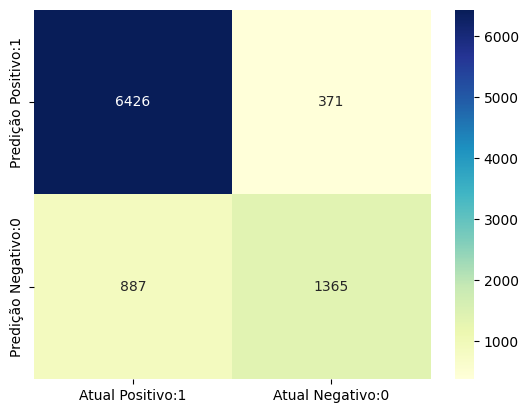

In [447]:
cm_matrix = pd.DataFrame(data=cm, columns=['Atual Positivo:1', 'Atual Negativo:0'],
                                 index=['Predição Positivo:1', 'Predição Negativo:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Verificando o percentual da acurácia e do erro na predição da base de teste.

In [448]:
TP = cm[0,0] # Verdadeiro positivo
TN = cm[1,1] # Verdadeiro negativo
FP = cm[0,1] # Falso positivo
FN = cm[1,0] # Falso negativo

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Acurácia da classificação : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Erro de classificação : {0:0.4f}'.format(classification_error))

Acurácia da classificação : 0.8610
Erro de classificação : 0.1390


##**8 - Aplicação do modelo em toda base**

In [449]:
# Aplicando o modelo escolhido em toda à base existente
gb_all_dataset = GradientBoostingClassifier(n_estimators=num_trees)
X_all = encoder.fit_transform(X)

label_encoder = LabelEncoder()
label_encoder.fit(y)

y_all = label_encoder.transform(y)

gb_all_dataset.fit(X_all, y_all)

y_pred_all_model = gb_all_dataset.predict(X_all)

print(X.shape, y.shape)
print('Acurácia usando toda base: {0:0.4f}'. format(accuracy_score(y_all, y_pred_all_model)))

(30162, 13) (30162,)
Acurácia usando toda base: 0.8642


Matriz de confusão com toda a base

Confusion matrix

 [[21463  1191]
 [ 2905  4603]]

True Positives(TP) =  21463

True Negatives(TN) =  4603

False Positives(FP) =  1191

False Negatives(FN) =  2905


<Axes: >

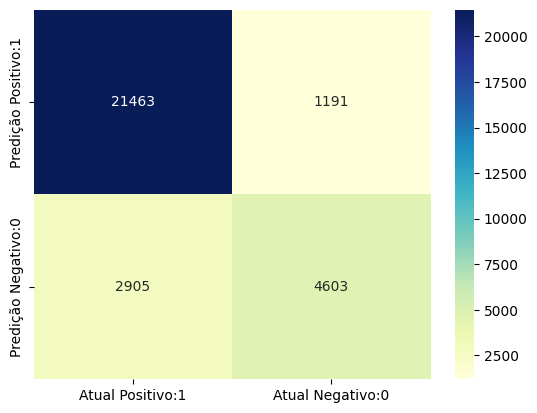

In [450]:
# Matriz de confusão de toda a base
cm_all = confusion_matrix(y_all, y_pred_all_model)

TP = cm_all[0,0] # Verdadeiro positivo
TN = cm_all[1,1] # Verdadeiro negativo
FP = cm_all[0,1] # Falso positivo
FN = cm_all[1,0] # Falso negativo

print('Confusion matrix\n\n', cm_all)

print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ', FP)

print('\nFalse Negatives(FN) = ', FN)

cm_matrix = pd.DataFrame(data=cm_all, columns=['Atual Positivo:1', 'Atual Negativo:0'],
                                 index=['Predição Positivo:1', 'Predição Negativo:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [451]:

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('\nAcurácia da classificação : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('\nErro de classificação : {0:0.4f}'.format(classification_error))


Acurácia da classificação : 0.8642

Erro de classificação : 0.1358


##**9 - Utilizando o Grid Search para localizar os melhores parâmetros**

Neste ensaio usarei o mesmo valor de "n_stimators" utilizado ao longo do estudo, que foi a constante 100. A ideia é tentar encontrar melhores parâmetros que possam aumentar o resultado do modelo escolhido.

In [452]:
# Criando parâmetros scoring
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

# Uma amostra de parâmetros
parameters = {
    #"loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    #"min_samples_split": np.linspace(0.1, 0.5, 12),
    #"min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    #"max_features":["log2","sqrt"],
    #"criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[100]
    }
# Passando a função scoring no GridSearchCV
cv = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)

cv.fit(X_train, y_train_lb)

# Convertendo o clf.cv_results em dataframe
df=pd.DataFrame.from_dict(cv.cv_results_)

# Aplicando o cross validation em cv=2, com duas split: split0 and split1
df['accuracy_score']=(df['split0_test_accuracy']+df['split1_test_accuracy'])/2
# Os melhores parâmetros
df.loc[df['accuracy_score'].idxmax()]['params']

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}

Agora vou utilizar os valores identificados com a utilização do GriSearchCV.

learning_rate:0.1

max_depth: 5

n_estimators: 100

subsample: 1.0

(30162, 88) (30162,)
Acurácia usando os parâmetros do GridSearchCV: 0.8806
Confusion matrix

 [[21490  1164]
 [ 2437  5071]]

True Positives(TP) =  21490

True Negatives(TN) =  5071

False Positives(FP) =  1164

False Negatives(FN) =  2437


<Axes: >

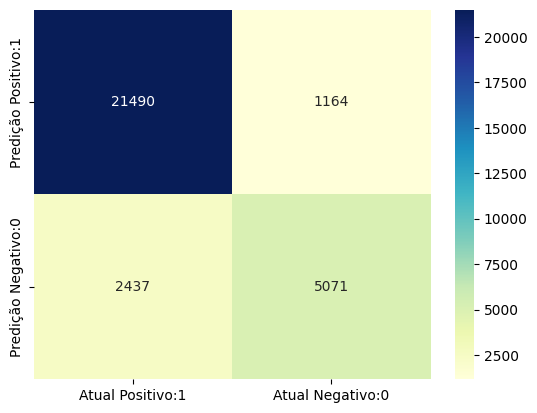

In [453]:
clf =GradientBoostingClassifier(
 learning_rate=0.1,
 max_depth= 5,
 n_estimators=100,
 subsample=1.0)
clf.fit(X_train, y_train_lb)
y_predict_GridSearchCV = clf.predict(X_test)

print(X_test.shape, y_test_lb.shape)
print('Acurácia usando os parâmetros do GridSearchCV: {0:0.4f}'. format(accuracy_score(y_test_lb, y_predict_GridSearchCV)))


# Matriz de confusão da base de teste
cm_all_GridSearchCV = confusion_matrix(y_test_lb, y_predict_GridSearchCV)

TP = cm_all_GridSearchCV[0,0] # Verdadeiro positivo
TN = cm_all_GridSearchCV[1,1] # Verdadeiro negativo
FP = cm_all_GridSearchCV[0,1] # Falso positivo
FN = cm_all_GridSearchCV[1,0] # Falso negativo

print('Confusion matrix\n\n', cm_all_GridSearchCV)

print('\nTrue Positives(TP) = ', TP)

print('\nTrue Negatives(TN) = ', TN)

print('\nFalse Positives(FP) = ', FP)

print('\nFalse Negatives(FN) = ', FN)

cm_matrix = pd.DataFrame(data=cm_all_GridSearchCV, columns=['Atual Positivo:1', 'Atual Negativo:0'],
                                 index=['Predição Positivo:1', 'Predição Negativo:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')



In [454]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('\nAcurácia da classificação : {0:0.4f}'.format(classification_accuracy))

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('\nErro de classificação : {0:0.4f}'.format(classification_error))


Acurácia da classificação : 0.8806

Erro de classificação : 0.1194


##**10 - Conclusão**

Após o estudo a escolha do modelo foi o "GB-orig"(Gradient Boosting Classifier), cujo modelo demonstrou uma boa precisão em comparação aos modelos testados. Usando a matriz de confusão, 371 foram classsificados com falso positivo e 887 como falso negativo, representando um erro de 13,9% das predições dos dados de teste, ficando dentro da meta a ser alcançada de no máximo 14%.

Na aplicação do modelo na base de teste e treinamento não foi encontrado cenário de overfitting, já que os percentuais no treinamento (86,8%) e no teste (86,1%) ficaram equivalentes.

Ao aplicar o modelo em toda à base existente, obtive o percentual de acerto de 86,4% e 13,6% de erro na predição.

Para refinar o modelo classificatório, recorri ao recurso do GridSearchCV para testar melhores parâmetros para o modelo. No ensaio identifiquei que a utilização dos parâmetros learning_rate:0.1, max_depth: 5, n_estimators: 100 e subsample: 1, permitiriam um ganho de 2% na acurácia da predição, ficando uma taxa de 88%.

Esta taxa alcançada se equipara ao ensaio feito pelos Chakrabarty e Biswas que obtiveram 88,16% de precisão de validação em uma divisão de teste de 80-20 usando o modelo Gradient Boosting Classifier.

Chakrabarty, N., Biswas, S. (2018). A Statistical Approach to Adult
Census Income Level Prediction. arXiv.
https://doi.org/10.48550/arXiv.1810.10076